In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link1 = 'https://drive.google.com/open?id=1ubYms7QLU3BgS0emBy5Zz-GX-_mBX5e1'# dataset >>fa_2.csv
link2 = 'https://drive.google.com/open?id=1XS_vCvjPH9JG_FdcH8i9INw_7GwAJhf7' # Word Embeding >> cc.fa.300.vec

In [4]:
fluff, id1 = link1.split('=')
print (id1) 

1ubYms7QLU3BgS0emBy5Zz-GX-_mBX5e1


In [5]:
fluff, id2 = link2.split('=')
print (id2) 

1XS_vCvjPH9JG_FdcH8i9INw_7GwAJhf7


In [0]:
import pandas as pd

In [0]:
downloaded = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('fa_2.csv')  
dataset = pd.read_csv('fa_2.csv',index_col=None, header=None, encoding="utf-8",names = "text,label".split(','))# Dataset is now stored in a Pandas Dataframe

In [9]:
dataset.head(10)

,text,label
0,دوست عزیز یک چیزهایی به عقیده ربطی نداره همه م...,pos
1,فتح هندباعث سرافرازی نبود؛برای من دستگیری متجا...,neg
2,بدی توییتر تا اینجا که فهمیدم اینه خیلی ها تو ...,neg
3,والا همین بچه های صنعتی دقیقا یکسال پیش برای ح...,pos
4,یه هشتک #جنگ_نمیشود_مذاکره_نمیکنیم هم میزدی دس...,neg
5,واقعا نمیتونم بفهممشون اینا الان حرفشون اینه ک...,neg
6,واسه ما معمولیا شب یلدامون فرقی باشبای دیگه ند...,neg
7,"""گشنگان بدبخت افطاری نخورده رو ببینین. کسانی ک...",neg
8,مخاطبین @SalomeSeyednia کم سن وسال و کسانی که ...,neg
9,خدا منم، عید منم، حال خوب منم #کارنت_ مود,pos


In [0]:
# use fasttest for embedding
downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('cc.fa.300.vec')  
EMBEDDING_FILE = 'cc.fa.300.vec' # Word Embedding fast text

**befor install libraray**

In [11]:
!pip install hazm
!pip install stopwords_guilannlp  #for delete stop words . filter useless data

     |████████████████████████████████| 317kB 5.0MB/s 
     |████████████████████████████████| 235kB 16.1MB/s 
     |████████████████████████████████| 1.4MB 20.2MB/s 
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp36-cp36m-linux_x86_64.whl size=154491 sha256=0930f0db8b24384c8e8cc2f9db03d3c5c4e06d1ddfb7bedf940e227991a4752d
  Stored in directory: /root/.cache/pip/wheels/66/15/54/4510dce8bb958b1cdd2c47425cbd1e1eecc0480ac9bb1fb9ab
  Created wheel for nltk: filename=nltk-3.3-cp36-none-any.whl size=1394471 sha256=acf64a47663f7f89d887a26dbee183fa5caaa91e963ecc6be69907d09d770b22
  Stored in directory: /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
Successfully built libwapiti nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


**import library**

In [12]:
# General
import numpy as np
import pandas as pd
import codecs
import os
import matplotlib.pyplot as plt
# Word Embedding
from gensim.test.utils import common_texts
from gensim.models import KeyedVectors
# Keras
from keras import optimizers
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Embedding, Dropout
from keras.layers import GlobalMaxPool1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import CuDNNLSTM, LSTM, Bidirectional
from keras.layers.convolutional import Conv1D
from keras.utils.np_utils import to_categorical
from keras.metrics import categorical_accuracy
from keras.utils import plot_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# Preprocessing
from stopwords_guilannlp import stopwords_output
from hazm import *
# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils import plot_model
# Measuring metrics
from sklearn.metrics import f1_score
# test and train split
from sklearn.model_selection import train_test_split
#save model
from keras.models import load_model

Using TensorFlow backend.


**Analyze Dataset**

In [0]:
X = dataset['text']
Y = dataset['label']

In [14]:
print('Number of Dataset sentence' , X.shape)
print('Number of Dataset labels' , Y.shape)

Number of Dataset sentence (5000,)
Number of Dataset labels (5000,)


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=42)

In [16]:
print('Number of x_train sentence after train and test split' , x_train.shape)
print('Number of y_train labels after train and test split' , y_train.shape)

print('Number of x_test sentence after train and test split' , x_test.shape)
print('Number of y_test labels after train and test split' , y_test.shape)

Number of x_train sentence after train and test split (4750,)
Number of y_train labels after train and test split (4750,)
Number of x_test sentence after train and test split (250,)
Number of y_test labels after train and test split (250,)


In [0]:
# Convert dataframes to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)


In [18]:
from collections import Counter

cnt = Counter(Y)
cnt = dict(cnt)
print(cnt)

{'pos': 1619, 'neg': 3070, 'med': 311}


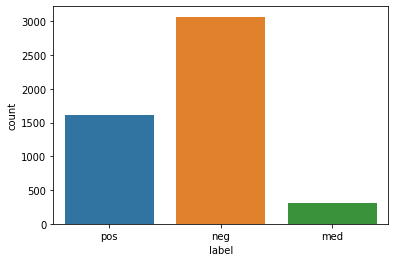

In [19]:
import seaborn as sns
sns.countplot(x='label', data=dataset);

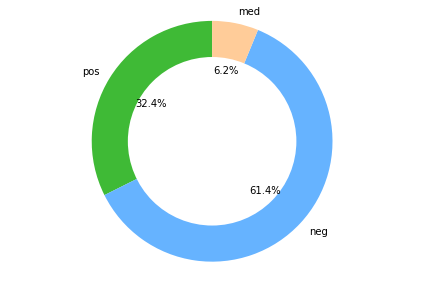

In [20]:
labels = list(cnt.keys())
sizes = list(cnt.values())
colors = ['#3fba36', '#66b3ff','#ffcc99','#ff9999', '#d44444']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [0]:
puncs = ['،', '.', ',', ':', ';', '"']
normalizer = Normalizer()
lemmatizer = Lemmatizer()


def clean_doc(doc):
    doc = normalizer.normalize(doc) 
    tokenized = word_tokenize(doc) 
    tokens = []
    for t in tokenized:
      temp = t
      for p in puncs:
        temp = temp.replace(p, '')
      tokens.append(temp)
    
    tokens = [w for w in tokens if not len(w) <= 1]
    tokens = [w for w in tokens if not w.isdigit()]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    tokens = ' '.join(tokens)
    return tokens

In [22]:
def import_with_gensim(file_address):
  ft_model = KeyedVectors.load_word2vec_format(file_address)
  ft_words = []
  for ft_word in ft_model.vocab:
      ft_words.append(ft_word)
  return ft_model, ft_words
  
ft_model, ft_words = import_with_gensim(EMBEDDING_FILE)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# FastText embed size
embed_size = 300 # defult

In [0]:
embedding_list = list()
for w in ft_words:
  embedding_list.append(ft_model[w])

all_embedding = np.stack(embedding_list)
emb_mean, emb_std = all_embedding.mean(), all_embedding.std()

In [0]:
# Apply preprocessing on training data
train_docs = np.empty_like(x_train)
for index, document in enumerate(x_train):
  train_docs[index] = clean_doc(document)

In [0]:
# Applying preprocessing on test data
test_docs = np.empty_like(x_test)
for index, document in enumerate(x_test):
  test_docs[index] = clean_doc(document)

In [0]:
num_words = 2000
# Create the tokenizer
tokenizer = Tokenizer(num_words=num_words)
# fFt the tokenizer on the training documents
tokenizer.fit_on_texts(train_docs)

In [0]:
# Find maximum length of training sentences
max_length = max([len(s.split()) for s in train_docs])

In [29]:
max_length

109

In [0]:
# Embed training sequences
encoded_docs = tokenizer.texts_to_sequences(train_docs)

# Pad embeded training sequences
x_train_padded = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [0]:
# Define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index)

In [32]:
vocab_size

16557

In [33]:
x_train_padded.shape

(4750, 109)

In [34]:
# set the embedding size
nb_words = len(tokenizer.word_index)

# Number of Words in data for seting embedding file
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))

# created embedding matrix
# loaded pre-trained embedding
embeddedCount = 0
for word, i in tokenizer.word_index.items():
    i -= 1
    # if this word is Fastetext, if yes, get the  embedding vector
    if word in ft_model.vocab:
        embedding_vector = ft_model[word]
        # astore inside the embedding matrix 
        embedding_matrix[i] = embedding_vector
        embeddedCount += 1
    #else:   # Unknown words


print('total embedded:', embeddedCount, 'common words')
print('Embedding matrix shape:', embedding_matrix.shape)

total embedded: 13963 common words
Embedding matrix shape: (16557, 300)


In [0]:
# Embed testing sequences
encoded_docs = tokenizer.texts_to_sequences(test_docs)
# Pad testing sequences
x_test_padded = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [36]:
y_train

array(['pos', 'neg', 'neg', ..., 'neg', 'pos', 'pos'], dtype=object)

In [0]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [38]:
print(y_train[:5])
print(y_test[:5])

[2 1 1 1 1]
[2 1 0 1 2]


In [0]:
# Prepare labels for categorical prediction
categorical_y_train = to_categorical(y_train,3 )
categorical_y_test = to_categorical(y_test,3)


In [40]:
# [med,neg,pos]
print(categorical_y_train[0:5])
print(categorical_y_test[0:5])

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [41]:
import tensorflow as tf
from tensorflow import keras
#kernel_regularizer=keras.regularizers.l2(l=0.1)
model_blstm = Sequential()
model_blstm.add(Embedding(vocab_size, 300 ,weights=[embedding_matrix], input_length=max_length))
model_blstm.add(Bidirectional(CuDNNLSTM(300, return_sequences=True, name='lstm_layer')))
model_blstm.add(GlobalMaxPool1D())
model_blstm.add(Dropout(0.05))
model_blstm.add(Dense(300, activation="relu"))
model_blstm.add(Dropout(0.05))
model_blstm.add(Dense(3, activation='softmax' ))











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [42]:
model_blstm.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[categorical_accuracy])

model_blstm.summary()
batch_size_blstm = 4750
epochs_blstm = 60



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 109, 300)          4967100   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 109, 600)          1444800   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 600)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               180300    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)              

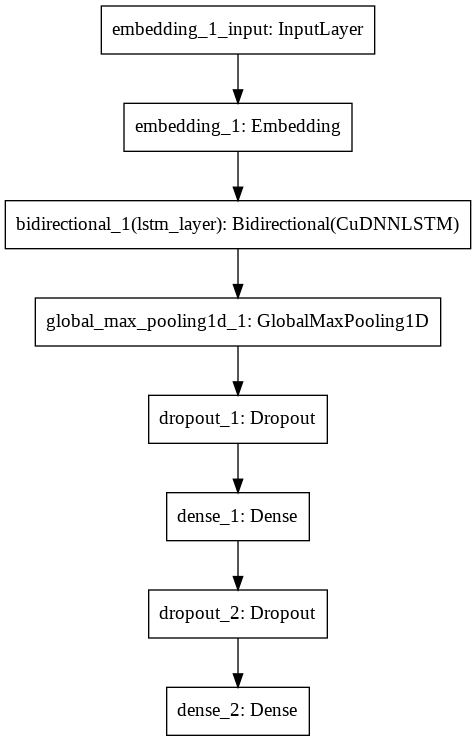

In [43]:
from keras.utils import plot_model
plot_model(model_blstm, to_file='model.png')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/60
4750/4750 [==============================] - 8s 2ms/step - loss: 1.1196 - categorical_accuracy: 0.0987
Epoch 2/60
4750/4750 [==============================] - 1s 201us/step - loss: 0.9238 - categorical_accuracy: 0.6152
Epoch 3/60
4750/4750 [==============================] - 1s 199us/step - loss: 0.8653 - categorical_accuracy: 0.6152
Epoch 4/60
4750/4750 [==============================] - 1s 201us/step - loss: 0.8308 - categorical_accuracy: 0.6152
Epoch 5/60
4750/4750 [==============================] - 1s 201us/step - loss: 0.8498 - categorical_accuracy: 0.6269
Epoch 6/60
4750/4750 [==============================] - 1s 201us/step - loss: 0.8329 - categorical_accuracy: 0.6194
Epoch 7/60
4750/4750 [==============================] - 1s 200us/step - loss: 0.8253 - categorical_accuracy: 0.6152
Epoch 8/60
4750/4750 [==============================] - 1s 201us/step - loss: 0.8216 - categor

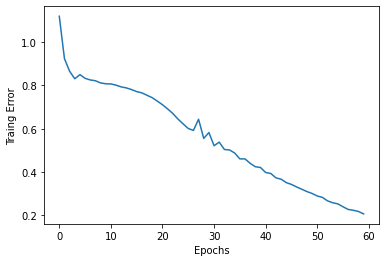

In [44]:
if os.path.exists('my_model.h5'):
    model = load_model('my_model.h5')
    
else: 
    hist_blstm = model_blstm.fit(x_train_padded, categorical_y_train, batch_size=batch_size_blstm, epochs=epochs_blstm, shuffle=True)
    #hist_blstm = model_blstm.fit(x_train_padded, categorical_y_train, batch_size=batch_size_blstm, epochs=epochs_blstm, shuffle=True,verbose=1)
    model_blstm.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'  
    plt.plot(hist_blstm.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Traing Error")

In [45]:
# Evaluate model
loss_blstm, acc_blstm = model_blstm.evaluate(x_test_padded, categorical_y_test, verbose=1)
print('Test Accuracy: %f' % (acc_blstm*100))

250/250 [==============================] - 0s 766us/step
Test Accuracy: 76.000000


In [0]:
# Get prediction label
y_pred_blstm = model_blstm.predict_classes(x_test_padded)

Confusion Matrix

In [0]:
y_test_label = []
for counter in range(0, len(categorical_y_test)):
  label = np.argmax(categorical_y_test[:][counter])
  y_test_label.append(label)
y_test_label = np.array(y_test_label)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    print(im)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

class_names = np.array([0, 1, 2, -2, -1])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[  0   6   8]
 [  0 125  23]
 [  0  23  65]]
AxesImage(54,36;334.8x217.44)
Normalized confusion matrix
[[0.   0.43 0.57]
 [0.   0.84 0.16]
 [0.   0.26 0.74]]
AxesImage(54,36;334.8x217.44)


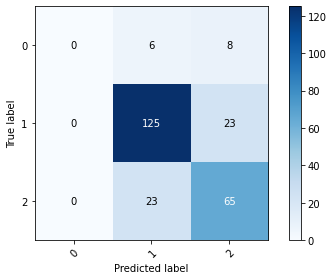

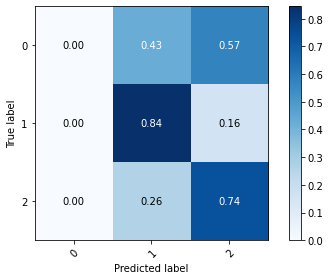

In [49]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_label, y_pred_blstm, classes=class_names)
# plt.savefig('cm-blstm.png')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test_label, y_pred_blstm, classes=class_names, normalize=True)
# plt.savefig('cm-blstm-normalized.png')
plt.show()